# Rough Load of FC C3 <img align="right" src="../Supplementary_data/dea_logo.jpg">

* **Compatability:** Notebook currently compatible with the`DEA Sandbox` environments
* **Products used:** 


In [1]:
%matplotlib inline

import datacube
import sys

sys.path.append("../Scripts")
from dea_plotting import display_map
from dea_plotting import rgb

### Connect to the datacube
The next step is to connect to the datacube database.
The resulting `dc` datacube object can then be used to load data.
The `app` parameter is a unique name used to identify the notebook that does not have any effect on the analysis.

In [62]:
dc = datacube.Datacube(app="Load_Fractional_Cover")

### Analysis parameters

The following variables are required to establish a query for this notebook:
- `lat_range`: The latitude range to analyse (e.g. `(-27.715, -27.755)`). For reasonable load times, keep this to a range of ~0.1 degrees or less.
- `lon_range`: The longitude range to analyse (e.g. `(153.42, 153.46)`). For reasonable load times, keep this to a range of ~0.1 degrees or less.
- `time_range`: The date range to analyse (e.g. `("2013", "2017")`).


In [38]:
lat_range = (-27.58, -27.666)
lon_range = (153.3, 153.4)
time_range = ("2010", "2021")

## View the queried location
Before running a query and extracting and analysing data, it is useful to double-check that your location is correct.
The `display_map()` function shows your selected area as a red rectangle on an interactive map.
Clicking on any point of the map will reveal the latitude and longitude coordinates of that point.

In [39]:
display_map(x=lon_range, y=lat_range)

## Query and view data
The variables specified above are used to load data from  the DEA datacube through the `dc.load()`, which was introduced in the [Loading data notebook](04_Loading_data.ipynb).
This introduction will continue to use the `ls8_nbart_geomedian_annual` product, as used in the [Loading data notebook](04_Loading_data.ipynb).

In [44]:
ds = dc.load(product="ga_ls_fc_3",
             x=lon_range,
             y=lat_range,
             time=time_range,
            output_crs='epsg:3577',
            resolution =(-30,30),
            group_by = 'solar_day')
print(ds)

<xarray.Dataset>
Dimensions:      (time: 8, x: 375, y: 372)
Coordinates:
  * time         (time) datetime64[ns] 2011-05-16T23:35:40.901884 ... 2020-07...
  * y            (y) float64 -3.165e+06 -3.165e+06 ... -3.176e+06 -3.176e+06
  * x            (x) float64 2.066e+06 2.066e+06 ... 2.077e+06 2.077e+06
    spatial_ref  int32 3577
Data variables:
    bs           (time, y, x) uint8 0 0 0 0 0 0 0 0 0 4 ... 0 2 0 0 0 255 0 0 0
    pv           (time, y, x) uint8 88 99 91 99 89 93 96 ... 72 72 70 78 83 84
    npv          (time, y, x) uint8 10 0 8 0 10 5 3 14 ... 27 27 26 27 21 15 15
    ue           (time, y, x) uint8 25 26 25 26 25 26 24 ... 23 22 24 26 26 24
Attributes:
    crs:           epsg:3577
    grid_mapping:  spatial_ref


In [47]:
print(ds.bs)

<xarray.DataArray 'bs' (time: 8, y: 372, x: 375)>
array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [ 20, 255,  37, ...,   0,   2,   0],
        [  3,   0,  14, ...,   0,   3,   0],
        [ 17,  27,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   6, ...,   0,   0,   0],
        [  0,   0,   6, ...,   0,   0,   0],
        ...,
        [ 18,  16,  16, ...,   3,   7,   0],
        [  9,  12,  13, ...,   0,   0,   0],
        [ 24,  14, 255, ..., 255,   0,   0]],

       [[  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        ...,
...
        ...,
        [  0,   0,   0, ...,   4, 255,   0],
        [  0,   0,   0, ...,   3,   0,   0],
        [  0,   0,   0, ...,   5,   0,   0]],

       [[ 52,  48,  51, ..., 255, 255,  20],
        [ 58,  59,  37, ..., 255,

### Selecting and plotting a single timestep

In [49]:
first_timestep = ds.pv.isel(time=0)

print(first_timestep)

<xarray.DataArray 'pv' (y: 372, x: 375)>
array([[ 88,  99,  91, ...,   0,   0, 105],
       [ 84,  90,  87, ...,   0,   0,   0],
       [ 85,  87,  87, ...,   0,   0, 104],
       ...,
       [ 47,  51,  36, ...,  89,  84,  78],
       [ 66,  59,  55, ...,  67,  84,  91],
       [ 46,  54,  77, ...,  81,  98,  99]], dtype=uint8)
Coordinates:
    time         datetime64[ns] 2011-05-16T23:35:40.901884
  * y            (y) float64 -3.165e+06 -3.165e+06 ... -3.176e+06 -3.176e+06
  * x            (x) float64 2.066e+06 2.066e+06 ... 2.077e+06 2.077e+06
    spatial_ref  int32 3577
Attributes:
    units:         percent
    nodata:        255
    crs:           epsg:3577
    grid_mapping:  spatial_ref


2. `.sel()`: This selects data using real-world coordinate labels like `time`. 
    For example, from the **Coordinates** section, the first timestep (i.e. the year 2013) is selected from the `xarray.DataArray` by specifying `.sel(time='2013')`:

In [50]:
first_timestep = ds.pv.sel(time='2020')

print(first_timestep)

<xarray.DataArray 'pv' (time: 1, y: 372, x: 375)>
array([[[80, 83, 82, ...,  0,  0,  0],
        [85, 82, 87, ...,  0,  0,  0],
        [82, 87, 87, ...,  0,  0,  0],
        ...,
        [55, 54, 34, ..., 71, 78, 77],
        [74, 60, 54, ..., 70, 78, 80],
        [43, 36, 54, ..., 78, 83, 84]]], dtype=uint8)
Coordinates:
  * time         (time) datetime64[ns] 2020-07-03T23:41:55.426739
  * y            (y) float64 -3.165e+06 -3.165e+06 ... -3.176e+06 -3.176e+06
  * x            (x) float64 2.066e+06 2.066e+06 ... 2.077e+06 2.077e+06
    spatial_ref  int32 3577
Attributes:
    units:         percent
    nodata:        255
    crs:           epsg:3577
    grid_mapping:  spatial_ref


After selecting a timestep, the `.plot()` method can be used to display the chosen `swir1` data:

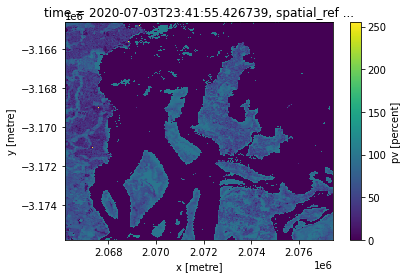

In [63]:
first_timestep.plot()

### Plotting multiple timesteps
It is often useful to produce plots for a single measurement across time, for example to compare change between satellite observations or summary datasets.
To plot multiple images, skip the `isel()` step above and plot the entire `xarray.DataArray` directly. 

To plot multiple timesteps in one figure, it is necessary to instruct the `.plot()` function to put each timestep in a different column.
This is done by specifying `.plot(col="time")`:

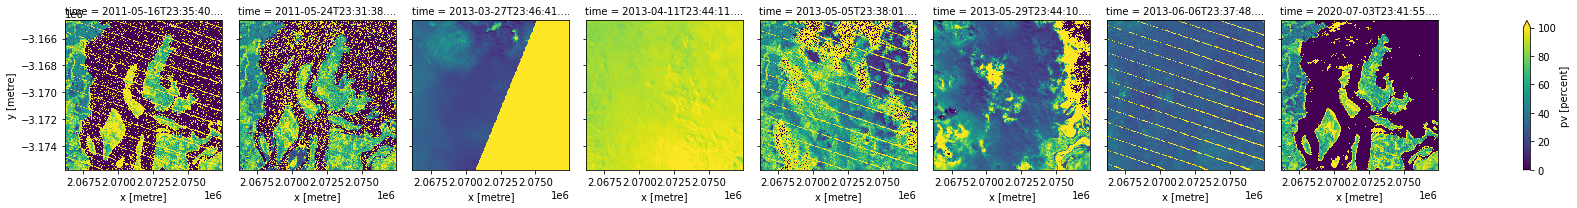

In [64]:
ds.pv.plot(col="time", vmin=0, vmax =100)

> This kind of plotting is called "facetted plotting". For more information, refer to the [xarray documentation](http://xarray.pydata.org/en/stable/plotting.html#faceting)

### Customising plot appearance
The plots above are dark and difficult to see clearly.
To improve the appearance of `xarray` plots, use the `robust=True` argument to optimise the plot colours by clipping extreme values or outliers. 
This will use the 2nd and 98th percentiles of the data to compute the color limits:

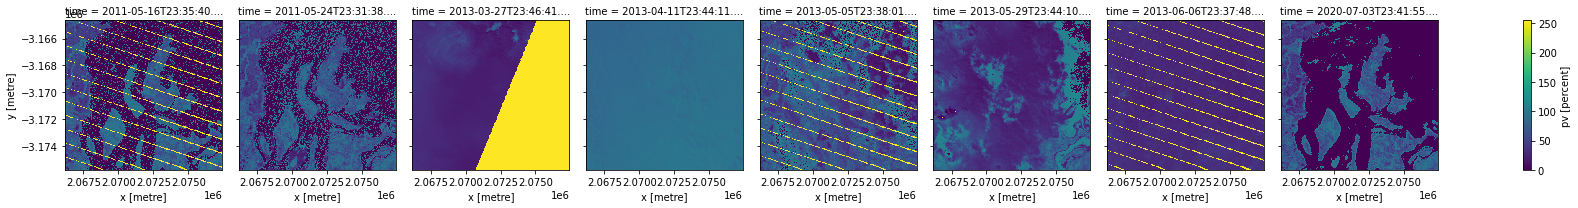

In [65]:
ds.pv.plot(col="time", robust=True)

Plots can be further customised by adding custom colour maps/styles using the `cmap` parameter.

When choosing a colour map for a plot, it is important to choose a set of colours that are perceived logically by the human eye. 
The best colour maps are "perceptually uniform": these colour maps increase logically from dark to light colours, where equal increases in lightness/darkness correspond to equal changes in data values. 
Some best-practice perceptually uniform colour maps include:

```
"viridis", "plasma", "inferno", "magma", "cividis"
```

> For further reading about perceptually uniform colour maps in data visualisation, refer to the [matplotlib documentation](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

It is also important to consider colour blindness when selecting a colour map. 
`xarray` supports many colour maps from the "colorbrewer" family of colour maps which are optimised for colour blindness.
You can use the interactive [online tool](http://colorbrewer2.org) to browse all available colour maps, or choose from one of the following commonly used options:

```
"Greys", "Purples", "Blues", "Greens", "Oranges", "Reds",
"YlOrBr", "YlOrRd", "OrRd", "PuRd", "RdPu", "BuPu", 
"GnBu", "PuBu", "YlGnBu", "PuBuGn", "BuGn", "YlGn"
```

For a full list of available colour maps you can refer to [this list](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).

The example cell below plots the data with the perceptually uniform `magma` colour map:


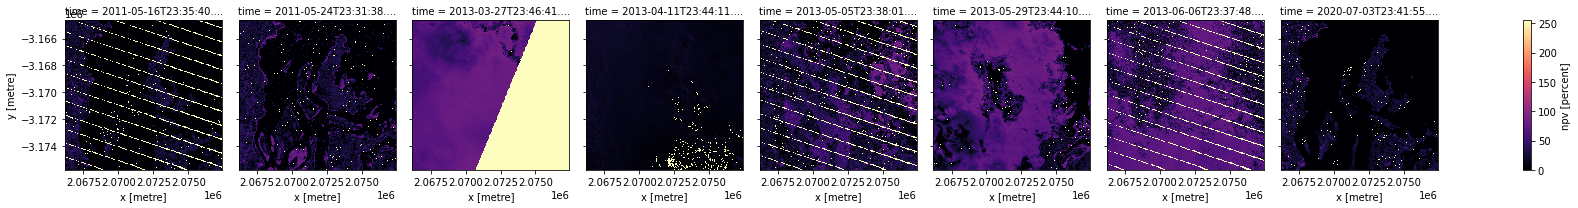

In [66]:
ds.npv.plot(col="time", robust=True, cmap="magma")

## Plotting true or false colour RGB images

Although `xarray` makes it easy to plot single band images, plotting a three band colour photo-like image is less straightforward.

To make this easier, the [dea-notebooks repository](https://github.com/GeoscienceAustralia/dea-notebooks) provides a custom `rgb()` function that is designed for plotting three band images.
The `rgb()` function maps three data variables/measurements from the loaded dataset to the red, green and blue channels that are used to make a three-colour image.

Providing the `red`, `green` and `blue` measurements from a dataset will produce a true colour image (akin to how humans view the landscape).
Providing `nir`, `red` and `green` measurements or any other set of three satellite bands from a dataset will produce a false colour image.

> [Learn more about colour rendering](https://en.wikipedia.org/wiki/False_color#True_color).

Hence, the `rgb()` function can be used to visualise the data returned by a query.
It requires the minimum input of:

* `ds:` The `xarray.Dataset` object
* `bands:` Three bands for display (these must be measurements found in the dataset) 
* `index:` The timestep to view, default is `0`

### Plotting a single timestep

The time dimension of an `xarray.Dataset` describes how many timesteps exist for the loaded data.
In the `rgb()` function, the `index` variable is asking for which timesteps to view (similar to the `isel()` example above).
Remember: counting in Python begins at 0 so to view the earliest timesteps set `index=0`:

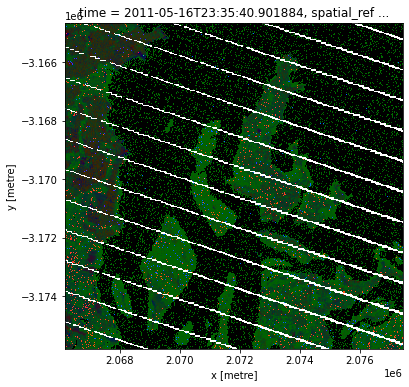

In [67]:
rgb(ds, bands=["bs", "pv", "npv"], index=0)

It is possible to change the input bands to plot a false colour image, which can provide different insights in a landscape.
The false colour band combination (`swir1`, `nir`, `green`) emphasises growing vegetation in green, and water in deep blue:

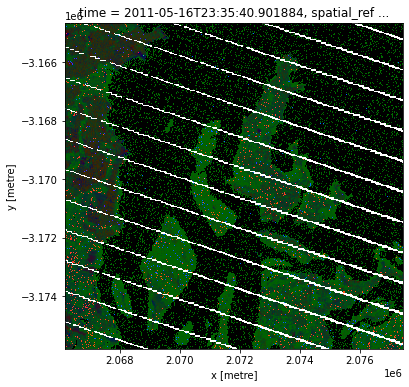

In [58]:
# View a swir1, nir, green (false colour) image of the first timestep
rgb(ds, bands=['bs', 'pv', 'npv'], index=0)

### Plotting multiple timesteps
As discussed in the [single band example above](#Plotting-multiple-timesteps), it can be useful to visualise multiple timesteps in a single plot (e.g. to compare change over time).

The `rgb()` function can also do this, as long as a list of timesteps to view is provided to the `index` argument, e.g. `index=[X1, X2, ...]`.
The example cell below plots the first and fifth image in the dataset using `index=[0, 4]` (remembering that counting in Python starts at 0):

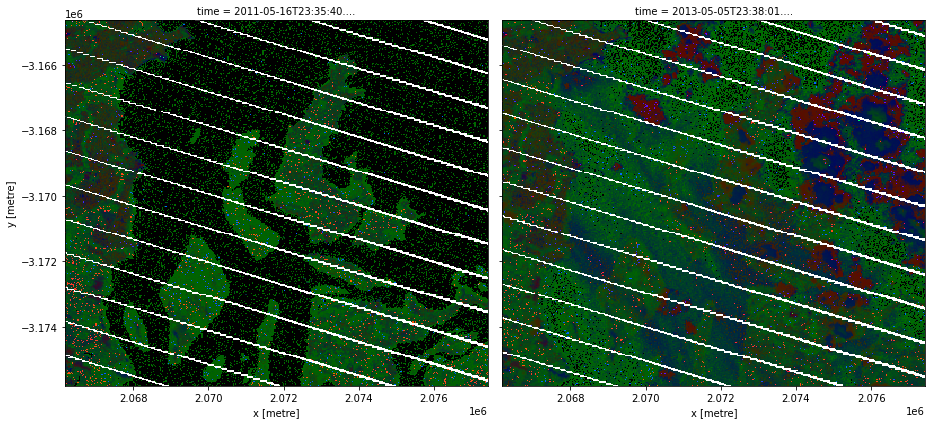

In [59]:
# View a true colour image for the first and fifth timesteps
rgb(ds, bands=['bs', 'pv', 'npv'], index=[0, 4])

It is also possible to use `rgb()` to plot all timesteps in a dataset using the `col="time"` syntax demonstrated in the [single band example above](#Plotting-multiple-timesteps): 

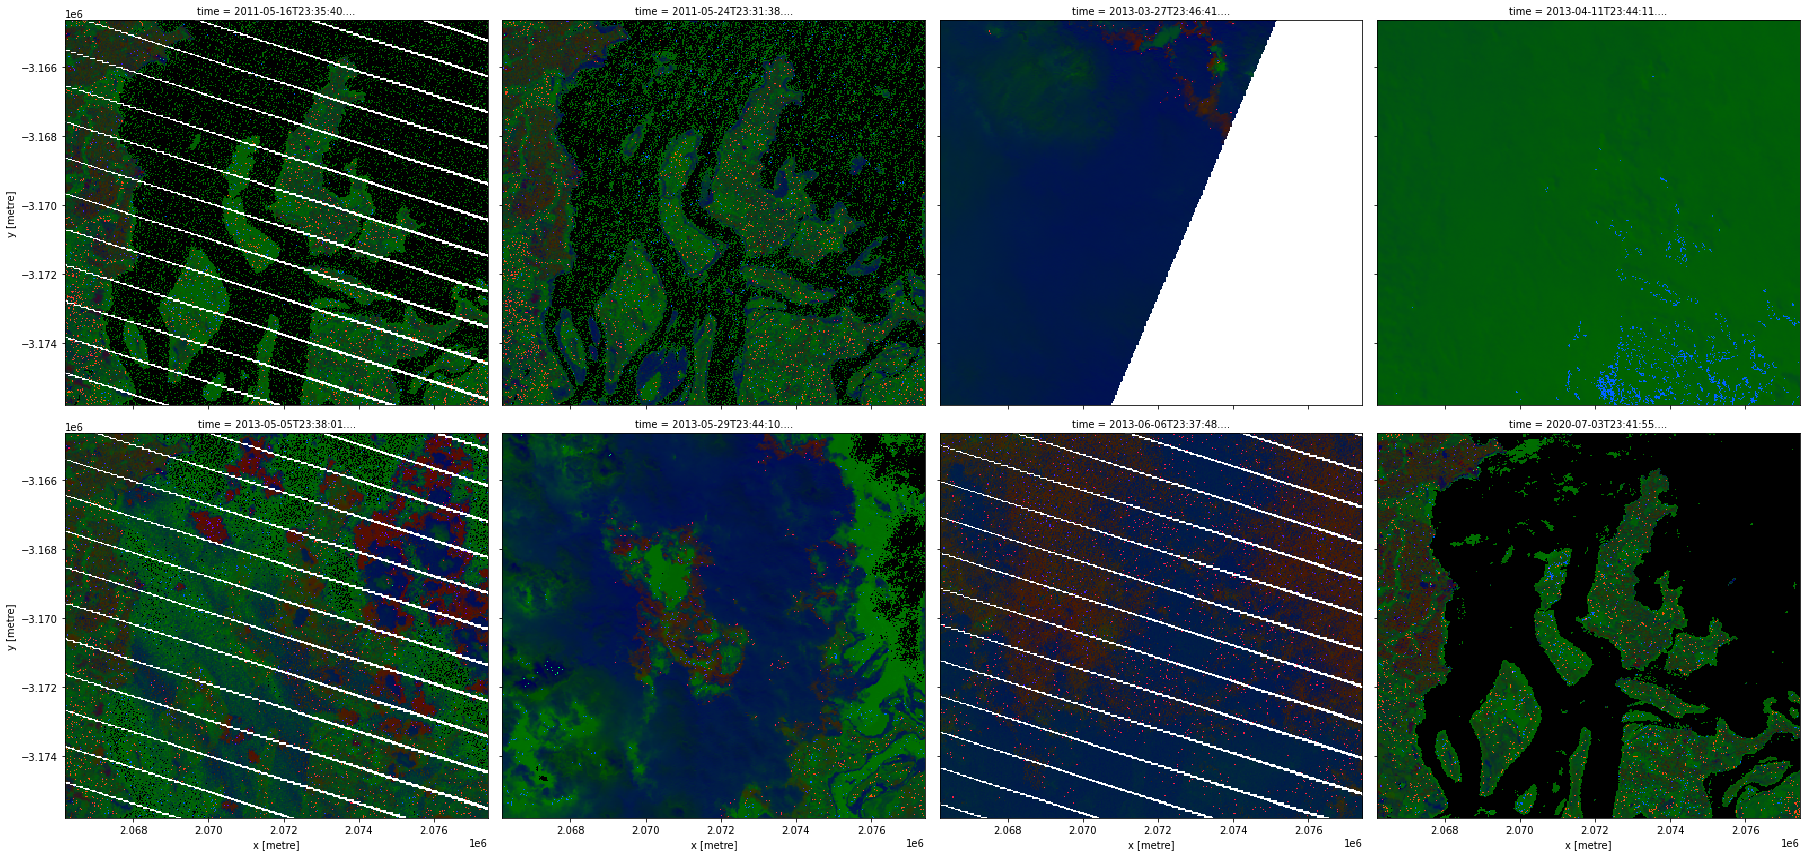

In [60]:
# Plot all timesteps in the dataset
rgb(ds, bands=['bs', 'pv', 'npv'], col="time")

### Customising plot appearance
By default, `rgb()` generates plots with `robust=True` to improve the appearance of the images by clipping out the darkest and brightest 2% of pixels, using the 2nd and 98th percentiles of the data to compute the colour limits

If this default provides poor results, the plot's colour stretch can be customised using the `percentile_stretch` parameter. 
This clips the most extreme minimum and maximum values in the dataset, improving the contrast and appearance of the plot.

For example, specifying `percentile_stretch=[0.05, 0.95]` will clip out the darkest and brightest 5% of pixels, focusing the colour stretch on the remaining 90% of less extreme values:

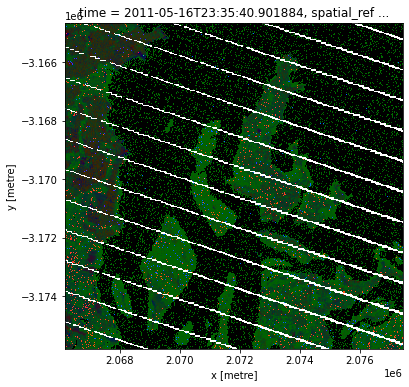

In [61]:
rgb(ds, 
    bands=['bs', 'pv', 'npv'], 
    index=0, 
    percentile_stretch=[0.05, 0.95])


## Recommended next steps

To continue working through the notebooks in this beginner's guide, the following notebooks are designed to be worked through in the following order:

1. [Jupyter Notebooks](01_Jupyter_notebooks.ipynb)
2. [Digital Earth Australia](02_DEA.ipynb)
3. [Products and measurements](03_Products_and_measurements.ipynb)
4. [Loading data](04_Loading_data.ipynb)
5. **Plotting (this notebook)**
6. [Performing a basic analysis](06_Basic_analysis.ipynb)
7. [Parallel processing with Dask](07_Parallel_processing_with_Dask.ipynb)

For advanced plotting and visualisation options, see:

* The [dea plotting](../Scripts/dea_plotting.py) Python script containing functions used for plotting and visualising DEA data.

Now that you have completed the first five tutorials, join advanced users in exploring:

* The "DEA datasets" directory in the repository, where you can explore DEA products in depth.
* The "Frequently used code" directory, which contains a recipe book of common techniques and methods for analysing DEA data.
* The "Real-world examples" directory, which provides more complex workflows and analysis case studies.




***
## Additional information
**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** December 2019

**Compatible datacube version:** 

In [18]:
print(datacube.__version__)

1.7+142.g7f8581cf


## Tags
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)